## Import of Dataframe and necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sql_functions import get_dataframe
pd.set_option('display.max_columns', 100)

## Import dataframe

In [2]:
from master_df import setup

df_master = setup()

df_master.fillna(0, inplace=True)

In [55]:
df_master

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,...,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2018-11-07 00:00:00,75.36,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-08-04 00:00:00,93.63,0.00,0.00,0.00,2021-08-04 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
2,430,Eberspächer Abgas,08.607.85,"N CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-07-14 00:00:00,76.95,0.00,0.00,0.00,2021-07-14 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
3,430,Eberspächer Abgas,08.607.80,"M CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2017-12-14 00:00:00,80.07,0.00,0.00,0.00,2013-09-24 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
4,430,Eberspächer Abgas,08.607.87,"N CORSA D 1,3L CDTI 55KW BJ",0,8,1,L20,2021-01-08 00:00:00,49.98,0.00,0.00,0.00,2021-01-08 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357824,0,BOSCH,0986479E79,BREMSSCHEIBE,0,VO,0,00RBABC,2023-05-12 00:00:00,78.93,"1,341.81",17.00,3.00,2023-03-15 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,"In Stock, sold","In Stock, sold",0,0,0,"In stock, not sold","Not in Stock, sold 3+",0,0,0
357825,17,BREMICKER,816E85,ZÜNDLEITUNG,0,0,5,L64,2010-06-09 00:00:00,5.82,0.00,0.00,0.00,2010-06-09 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357826,0,BOSCH,0986479E87,BREMSSCHEIBE,0,0,0,00RBABA,2022-05-04 00:00:00,37.76,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357827,0,BOSCH,0986479E91,BREMSSCHEIBE,0,0,0,00RBABA,2023-04-19 00:00:00,26.46,105.84,4.00,2.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0


## Quality of stock for a certain article to be assessed as "good" or "bad"


In [56]:
quality_stock_good_all = df_master.query('gesamt_lager > 0 and gesamt_vk >= 3').reset_index()
quality_stock_bad_all = df_master.query('gesamt_lager > 0  and gesamt_vk < 3').reset_index()

quality_stock_good_weiden = df_master.query('wen_lager > 0 and wen_vk >= 3').reset_index()
quality_stock_bad_weiden = df_master.query('wen_lager > 0 and wen_vk < 3').reset_index()

quality_stock_good_regensburg = df_master.query('rgb_lager > 0 and rgb_vk >= 3').reset_index()
quality_stock_bad_regensburg = df_master.query('rgb_lager > 0 and rgb_vk < 3').reset_index()

quality_stock_good_amberg = df_master.query('amb_lager > 0 and amb_vk >= 3').reset_index()
quality_stock_bad_amberg = df_master.query('amb_lager > 0 and amb_vk < 3').reset_index()

quality_stock_good_cham = df_master.query('cha_lager > 0 and cha_vk >= 3').reset_index()
quality_stock_bad_cham = df_master.query('cha_lager > 0 and cha_vk < 3').reset_index()

quality_stock_good_straubing = df_master.query('str_lager > 0 and str_vk >= 3').reset_index()
quality_stock_bad_straubing = df_master.query('str_lager > 0 and str_vk < 3').reset_index()

quality_stock_good_passau = df_master.query('pas_lager > 0 and pas_vk >= 3').reset_index()
quality_stock_bad_passau = df_master.query('pas_lager > 0 and pas_vk < 3').reset_index()

quality_stock_good_landshut = df_master.query('lan_lager > 0 and lan_vk >= 3').reset_index()
quality_stock_bad_landshut = df_master.query('lan_lager > 0 and lan_vk < 3').reset_index()

quality_stock_good_mühldorf = df_master.query('müh_lager > 0 and müh_vk >= 3').reset_index()
quality_stock_bad_mühldorf = df_master.query('müh_lager > 0 and müh_vk < 3').reset_index()

quality_stock_good_rosenheim = df_master.query('ros_lager > 0 and ros_vk >= 3').reset_index()
quality_stock_bad_rosenheim = df_master.query('ros_lager > 0 and ros_vk < 3').reset_index()

In [57]:
quality_stock_bad_all

,level_0,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,...,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality
0,14,430,Eberspächer Abgas,08.693.60,"K SET CORSA A 1,2I 33KW",0,0,1,L20,0,131.39,131.39,1.00,1.00,0,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0
1,17,430,Eberspächer Abgas,08.683.73,"R CORSA A 1,3N/S/1,4",0,0,1,L20,0,8.76,8.76,1.00,1.00,0,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0
2,20,430,Eberspächer Abgas,08.608.86,"N CORSA D 1,4L 66KW BJ 2006-",0,0,0,L20,2021-08-04 00:00:00,92.11,92.11,1.00,1.00,2021-08-04 00:00:00,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0
3,21,430,Eberspächer Abgas,08.683.90,"B CORSA A 1,0S",0,0,1,L20,2016-07-13 00:00:00,4.74,9.48,2.00,2.00,2016-07-13 00:00:00,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0
4,24,430,Eberspächer Abgas,08.592.90,"B KADETT E 1,7D AB 1989",0,0,1,L20,0,19.26,57.78,3.00,3.00,0,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57919,357813,0,BOSCH,0986479E23,BREMSSCHEIBE,0,0,0,00RBABD,2019-10-16 00:00:00,105.60,211.20,2.00,2.00,0,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0
57920,357814,17,BREMICKER,403E35,ZÜNDLEITUNG,0,0,5,L64,2004-01-01 00:00:00,10.89,32.67,3.00,3.00,2004-01-01 00:00:00,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0
57921,357817,0,BOSCH,0986479E39,BREMSSCHEIBE,0,N,0,00RBABA,2023-05-31 00:00:00,108.16,216.32,2.00,0.00,2023-05-31 00:00:00,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold",0,0,0,0,"In stock, not sold",0,0,0,0
57922,357821,17,BREMICKER,403E52,ZÜNDLEITUNG,0,0,5,L64,2010-01-05 00:00:00,11.22,11.22,1.00,1.00,2010-01-05 00:00:00,...,0.00,0.00,0.00,0.00,0.00,"In stock, not sold","In stock, not sold",0,0,0,0,0,0,0,0


## Summary how much of the stock is sold per year (in %)

In [58]:
sales_of_stock_all = (df_master[df_master['gesamt_vk'] > 0].count() / df_master[df_master['gesamt_lager'] > 0].count()) * 100

sales_of_stock_weiden = (df_master[df_master['wen_vk'] > 0].count() / df_master[df_master['wen_lager'] > 0].count()) * 100

sales_of_stock_regensburg = (df_master[df_master['rgb_vk'] > 0].count() / df_master[df_master['rgb_lager'] > 0].count()) * 100

sales_of_stock_amberg = (df_master[df_master['amb_vk'] > 0].count() / df_master[df_master['amb_lager'] > 0].count()) * 100

sales_of_stock_cham = (df_master[df_master['cha_vk'] > 0].count() / df_master[df_master['cha_lager'] > 0].count()) * 100

sales_of_stock_straubing = (df_master[df_master['str_vk'] > 0].count() / df_master[df_master['str_lager'] > 0].count()) * 100

sales_of_stock_passau = (df_master[df_master['pas_vk'] > 0].count() / df_master[df_master['pas_lager'] > 0].count()) * 100

sales_of_stock_landshut = (df_master[df_master['lan_vk'] > 0].count() / df_master[df_master['lan_lager'] > 0].count()) * 100

sales_of_stock_mühldorf = (df_master[df_master['müh_vk'] > 0].count() / df_master[df_master['müh_lager'] > 0].count()) * 100

sales_of_stock_rosenheim = (df_master[df_master['ros_vk'] > 0].count() / df_master[df_master['ros_lager'] > 0].count()) * 100

In [59]:
print(sales_of_stock_all['gesamt_lager'])

print(sales_of_stock_weiden['wen_lager'])

print(sales_of_stock_regensburg['rgb_lager'])

print(sales_of_stock_amberg['amb_lager'])

print(sales_of_stock_cham['cha_lager'])

print(sales_of_stock_straubing['str_lager'])

print(sales_of_stock_passau['pas_lager'])

print(sales_of_stock_landshut['lan_lager'])

print(sales_of_stock_mühldorf['müh_lager'])

print(sales_of_stock_rosenheim['ros_lager'])

85.14170411813262
56.87119675456389
346.4049079754601
406.1091340450771
1540.9937888198758
352.0904180836167
415.6904508342208
983.1526271893244
1245.9016393442623
425.3954305799649


## Visualization stock quality

In [60]:
#create quality_gesamt

""" PE_condition = [
    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] >= 3),
    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] < 3),
    (df_master['gesamt_lager'] <= 0)
]
PE_categories = ['Good', 'Bad', 'not in stock']
df_master['quality_gesamt'] = np.select(PE_condition, PE_categories) """

" PE_condition = [\n    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] >= 3),\n    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] < 3),\n    (df_master['gesamt_lager'] <= 0)\n]\nPE_categories = ['Good', 'Bad', 'not in stock']\ndf_master['quality_gesamt'] = np.select(PE_condition, PE_categories) "

In [61]:
#create new columns ti measure the quality

locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']
PE_categories = ['4+ sales, in stock', '4+ sales, no stock', '1-3 sales, in stock', '1-3 sales, no stock', '0 sales, in stock']

for x in locations:
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

df_master



,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,...,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2018-11-07 00:00:00,75.36,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-08-04 00:00:00,93.63,0.00,0.00,0.00,2021-08-04 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
2,430,Eberspächer Abgas,08.607.85,"N CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-07-14 00:00:00,76.95,0.00,0.00,0.00,2021-07-14 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
3,430,Eberspächer Abgas,08.607.80,"M CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2017-12-14 00:00:00,80.07,0.00,0.00,0.00,2013-09-24 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
4,430,Eberspächer Abgas,08.607.87,"N CORSA D 1,3L CDTI 55KW BJ",0,8,1,L20,2021-01-08 00:00:00,49.98,0.00,0.00,0.00,2021-01-08 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357824,0,BOSCH,0986479E79,BREMSSCHEIBE,0,VO,0,00RBABC,2023-05-12 00:00:00,78.93,"1,341.81",17.00,3.00,2023-03-15 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,"4+ sales, in stock","4+ sales, in stock",0,0,0,"0 sales, in stock","4+ sales, no stock",0,0,0
357825,17,BREMICKER,816E85,ZÜNDLEITUNG,0,0,5,L64,2010-06-09 00:00:00,5.82,0.00,0.00,0.00,2010-06-09 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357826,0,BOSCH,0986479E87,BREMSSCHEIBE,0,0,0,00RBABA,2022-05-04 00:00:00,37.76,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357827,0,BOSCH,0986479E91,BREMSSCHEIBE,0,0,0,00RBABA,2023-04-19 00:00:00,26.46,105.84,4.00,2.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,"0 sales, in stock","0 sales, in stock",0,0,0,0,0,0,0,0


In [62]:
""" # Erstellen Sie das Balkendiagramm

df_master_gesamt = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität gesamt")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_gesamt['gesamt_quality'].value_counts().index, y=df_master_gesamt['gesamt_quality'].value_counts(), data=df_master_gesamt)
plt.xticks(rotation=90)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')
    
plt.show() """


' # Erstellen Sie das Balkendiagramm\n\ndf_master_gesamt = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität gesamt")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_gesamt[\'gesamt_quality\'].value_counts().index, y=df_master_gesamt[\'gesamt_quality\'].value_counts(), data=df_master_gesamt)\nplt.xticks(rotation=90)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n    \nplt.show() '

In [63]:
""" df_master_weiden = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Weiden")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_weiden['wen_quality'].value_counts().index, y=df_master_weiden['wen_quality'].value_counts(), data=df_master_weiden)
plt.xticks(rotation=90)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.show() """

' df_master_weiden = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Weiden")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_weiden[\'wen_quality\'].value_counts().index, y=df_master_weiden[\'wen_quality\'].value_counts(), data=df_master_weiden)\nplt.xticks(rotation=90)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.show() '

In [64]:
""" df_master_regensburg = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Regensburg")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_regensburg['rgb_quality'].value_counts().index, y=df_master_regensburg['rgb_quality'].value_counts(), data=df_master_regensburg)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_regensburg = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Regensburg")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_regensburg[\'rgb_quality\'].value_counts().index, y=df_master_regensburg[\'rgb_quality\'].value_counts(), data=df_master_regensburg)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [65]:
""" df_master_amberg = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Amberg")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_amberg['amb_quality'].value_counts().index, y=df_master_amberg['amb_quality'].value_counts(), data=df_master_amberg)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_amberg = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Amberg")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_amberg[\'amb_quality\'].value_counts().index, y=df_master_amberg[\'amb_quality\'].value_counts(), data=df_master_amberg)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [66]:
""" df_master_cham = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Cham")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_cham['cha_quality'].value_counts().index, y=df_master_cham['cha_quality'].value_counts(), data=df_master_cham)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_cham = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Cham")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_cham[\'cha_quality\'].value_counts().index, y=df_master_cham[\'cha_quality\'].value_counts(), data=df_master_cham)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [67]:
""" df_master_straubing = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Straubing")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_straubing['str_quality'].value_counts().index, y=df_master_straubing['str_quality'].value_counts(), data=df_master_straubing)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_straubing = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Straubing")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_straubing[\'str_quality\'].value_counts().index, y=df_master_straubing[\'str_quality\'].value_counts(), data=df_master_straubing)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [68]:
""" df_master_passau = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Passau")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_passau['pas_quality'].value_counts().index, y=df_master_passau['pas_quality'].value_counts(), data=df_master_passau)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_passau = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Passau")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_passau[\'pas_quality\'].value_counts().index, y=df_master_passau[\'pas_quality\'].value_counts(), data=df_master_passau)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [69]:
""" df_master_landshut = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Landshut")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_landshut['lan_quality'].value_counts().index, y=df_master_landshut['lan_quality'].value_counts(), data=df_master_landshut)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_landshut = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Landshut")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_landshut[\'lan_quality\'].value_counts().index, y=df_master_landshut[\'lan_quality\'].value_counts(), data=df_master_landshut)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [70]:
""" df_master_mühldorf = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Mühldorf")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_mühldorf['müh_quality'].value_counts().index, y=df_master_mühldorf['müh_quality'].value_counts(), data=df_master_mühldorf)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_mühldorf = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Mühldorf")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_mühldorf[\'müh_quality\'].value_counts().index, y=df_master_mühldorf[\'müh_quality\'].value_counts(), data=df_master_mühldorf)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [71]:
""" df_master_rosenheim = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Rosenheim")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_rosenheim['ros_quality'].value_counts().index, y=df_master_rosenheim['ros_quality'].value_counts(), data=df_master_rosenheim)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_rosenheim = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Rosenheim")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_rosenheim[\'ros_quality\'].value_counts().index, y=df_master_rosenheim[\'ros_quality\'].value_counts(), data=df_master_rosenheim)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

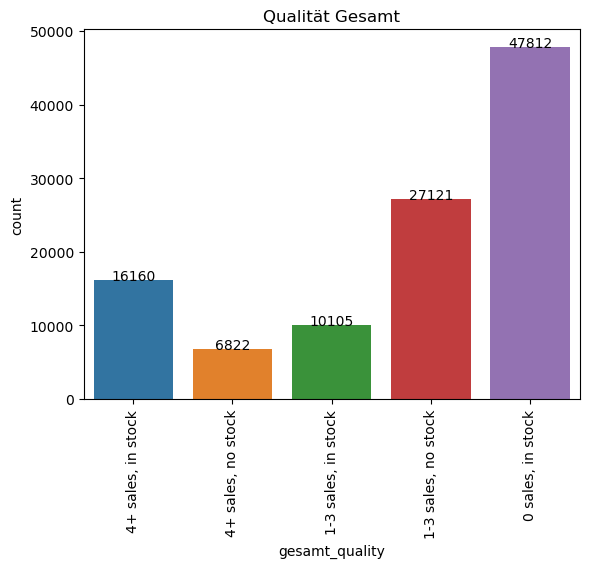

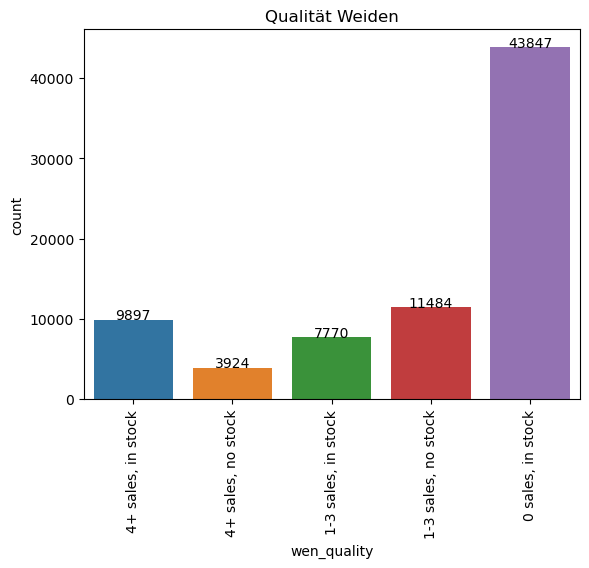

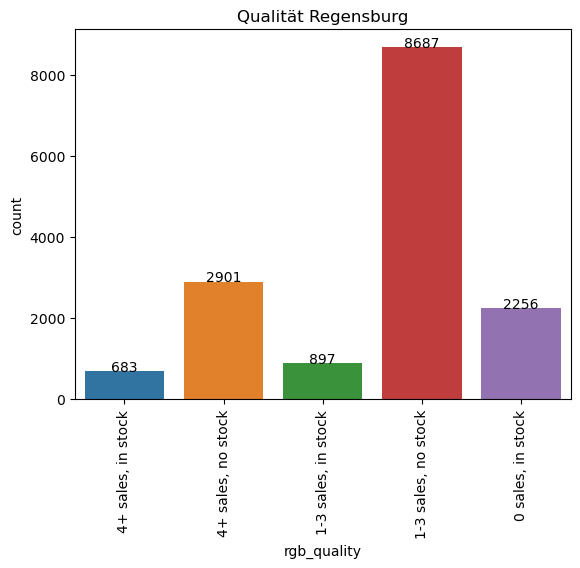

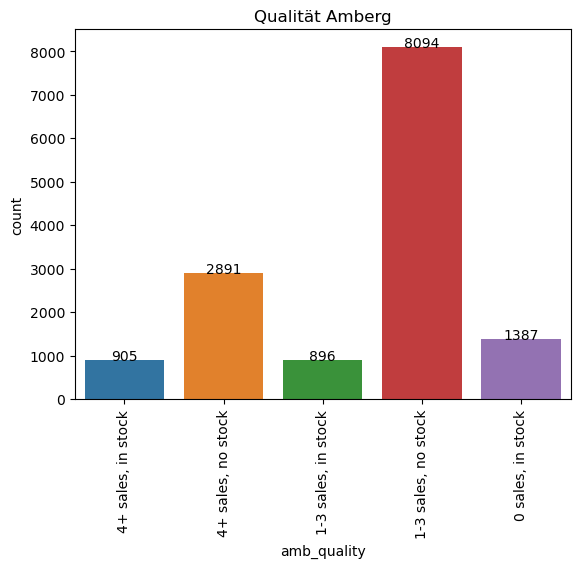

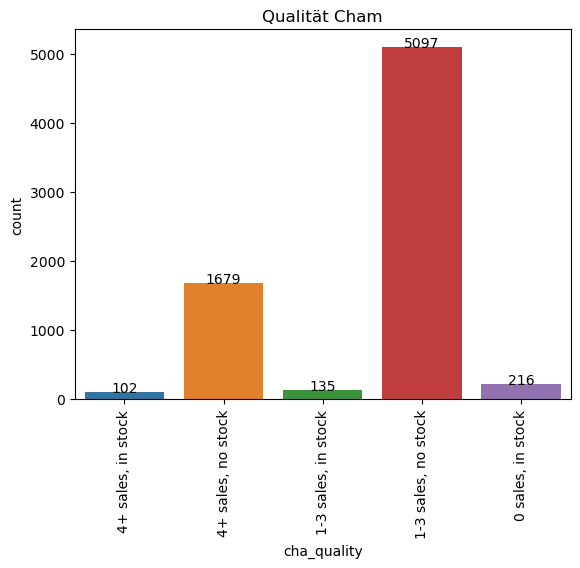

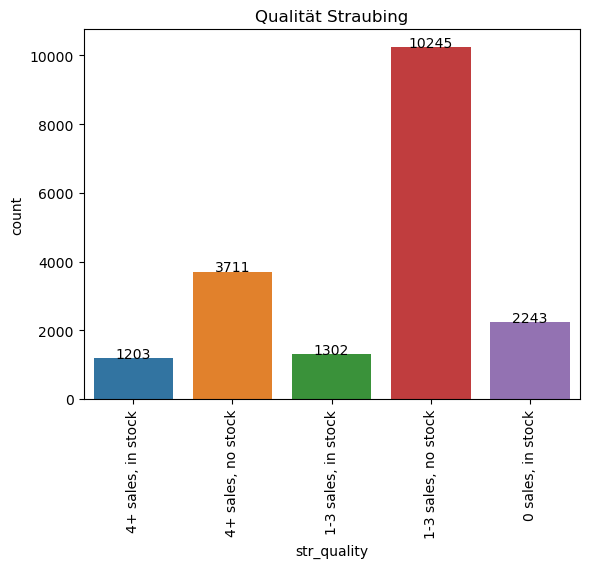

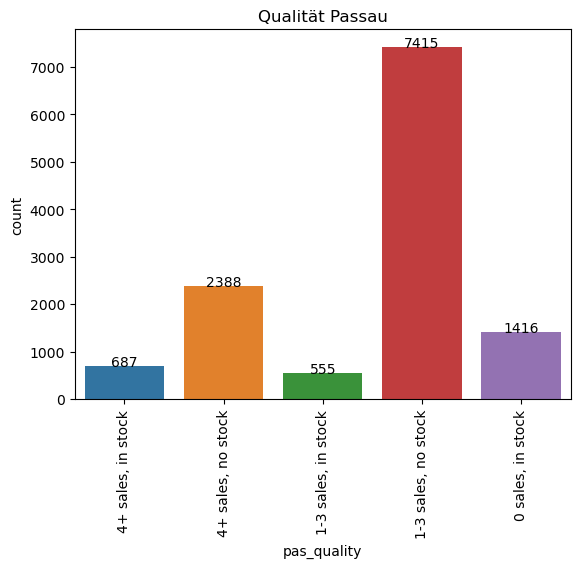

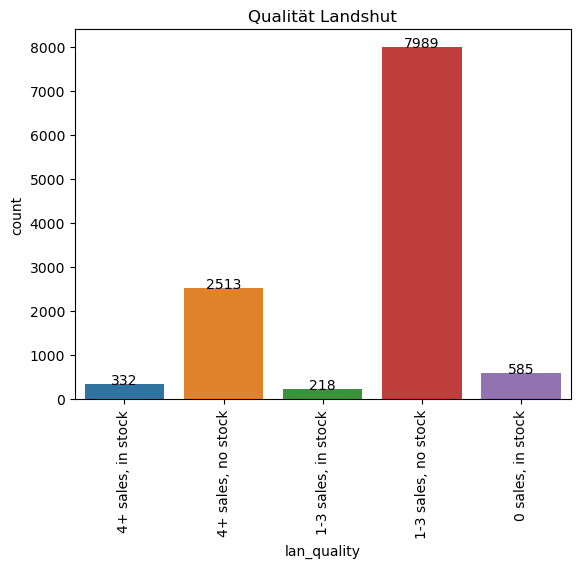

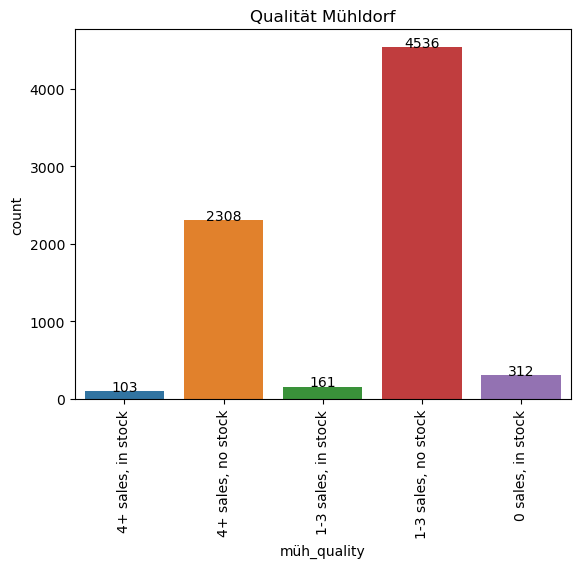

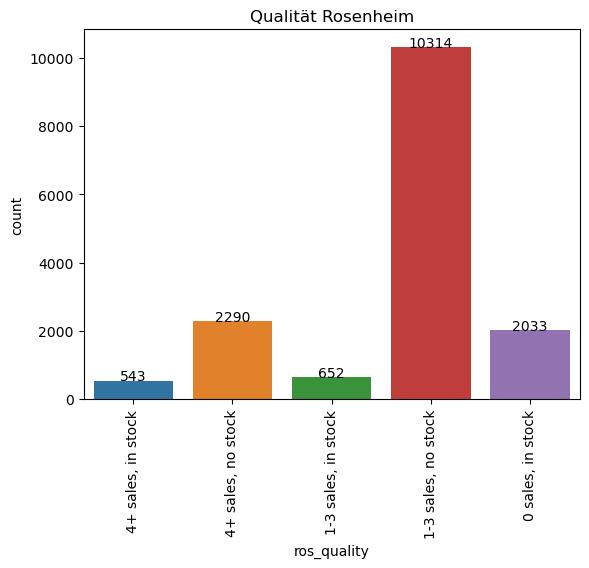

In [72]:
display_order_stock = PE_categories

locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_stock)

    for p in ax.patches:
        # Erhalte die Höhe und die Position jedes Balkens
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2

        # Füge einen Text über dem Balken hinzu
        ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

    plt.xticks(rotation=90)
    plt.show()

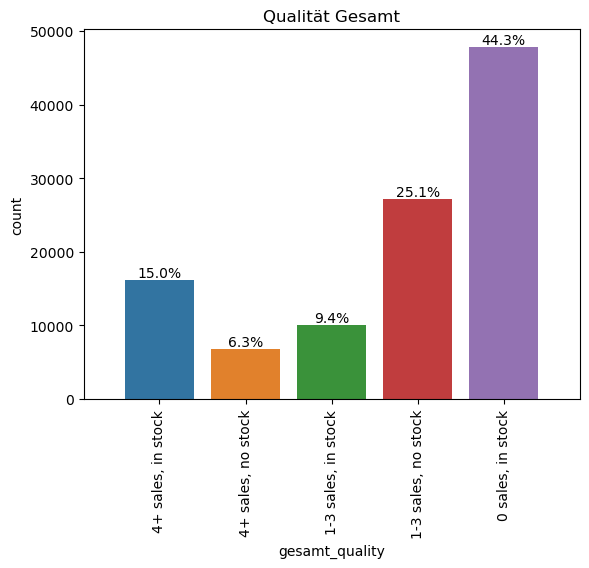

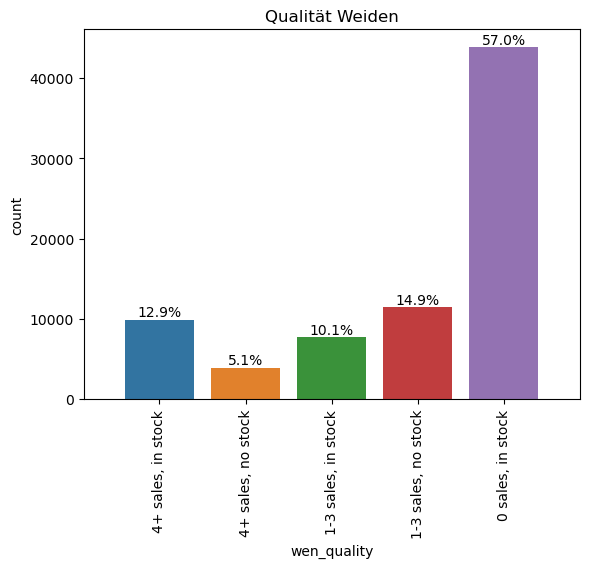

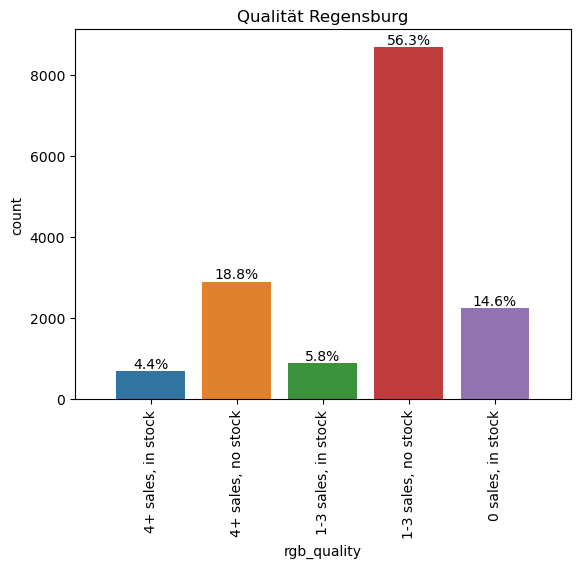

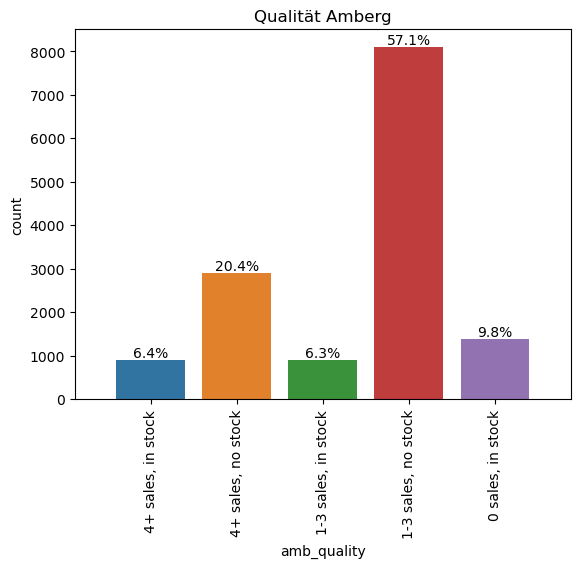

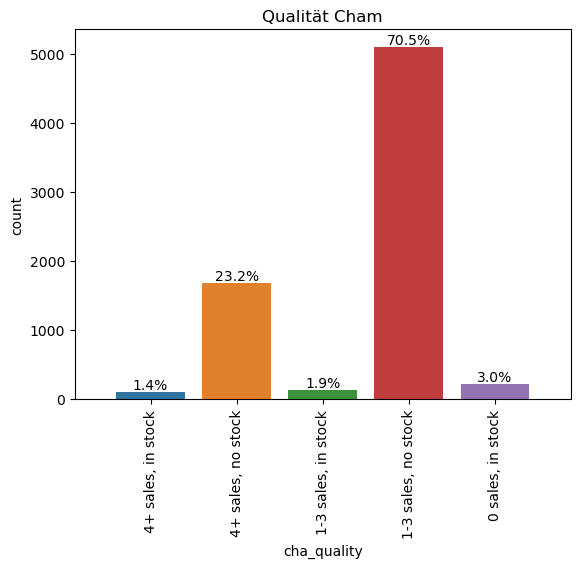

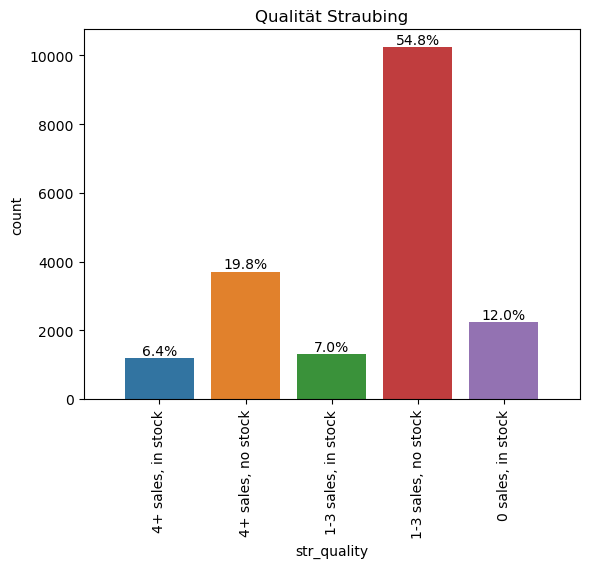

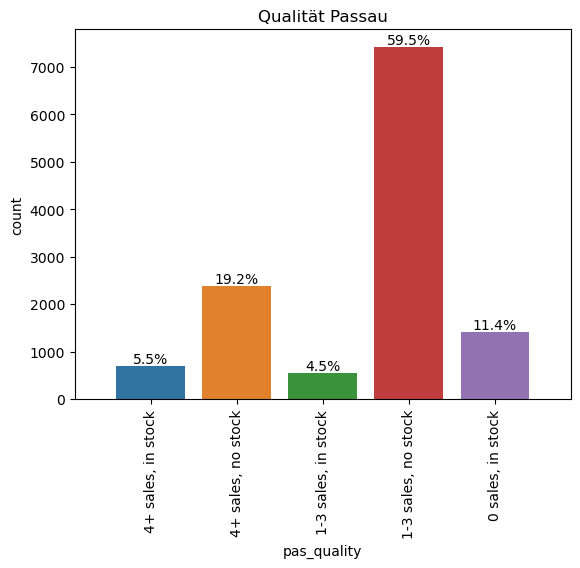

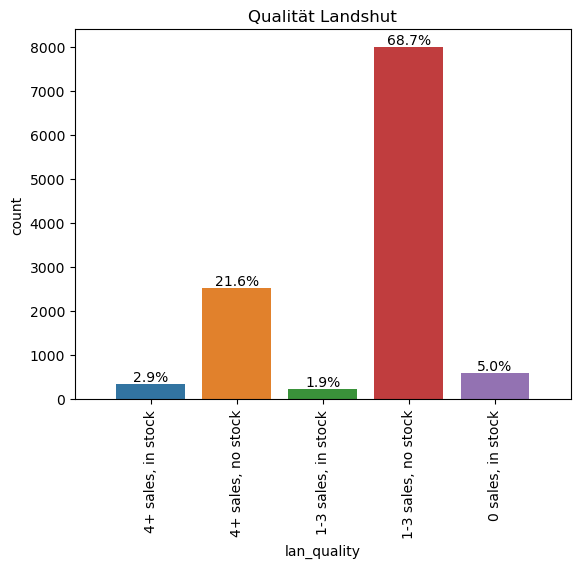

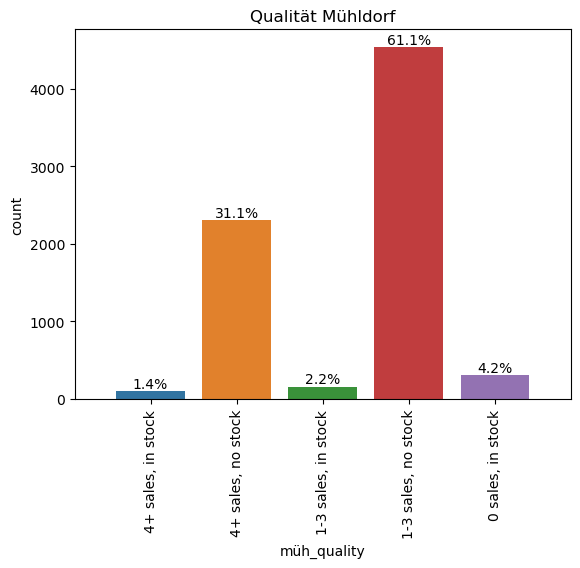

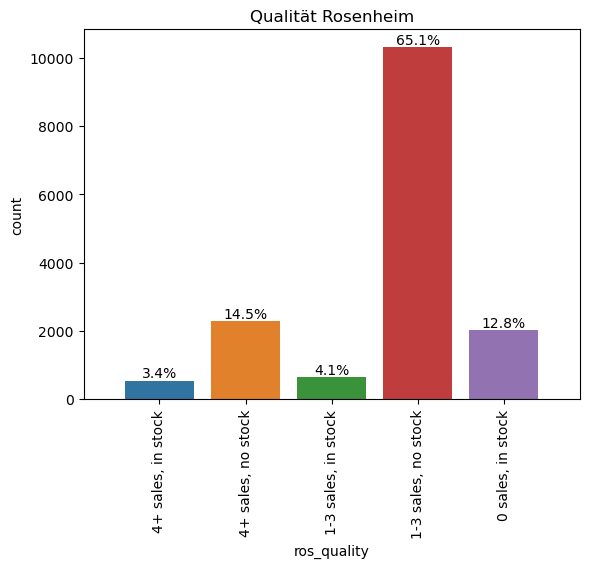

In [73]:
locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_stock)

    # Erhalten Sie die Gesamtzahl der Qualitätsspalte
    total = location[key + '_quality'].count()

    # Beschriften Sie die Balken mit dem fmt-Parameter
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

    # Fügen Sie etwas Platz am Ende des Balkens für die Beschriftungen hinzu
    ax.margins(x=0.1)

    plt.xticks(rotation=90)
    plt.show()

In [75]:
locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']
PE_categories = ['In stock, 4+ sales', 'In stock, 3 sales', 'In stock, 2 sales', 'In stock, 1 sale', 'In stock, 0 sales']

for x in locations:
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 2),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 1),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)   
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

df_master

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,...,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2018-11-07 00:00:00,75.36,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-08-04 00:00:00,93.63,0.00,0.00,0.00,2021-08-04 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
2,430,Eberspächer Abgas,08.607.85,"N CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-07-14 00:00:00,76.95,0.00,0.00,0.00,2021-07-14 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
3,430,Eberspächer Abgas,08.607.80,"M CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2017-12-14 00:00:00,80.07,0.00,0.00,0.00,2013-09-24 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
4,430,Eberspächer Abgas,08.607.87,"N CORSA D 1,3L CDTI 55KW BJ",0,8,1,L20,2021-01-08 00:00:00,49.98,0.00,0.00,0.00,2021-01-08 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357824,0,BOSCH,0986479E79,BREMSSCHEIBE,0,VO,0,00RBABC,2023-05-12 00:00:00,78.93,"1,341.81",17.00,3.00,2023-03-15 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,"In stock, 4+ sales","In stock, 4+ sales",0,0,0,"In stock, 0 sales",0,0,0,0
357825,17,BREMICKER,816E85,ZÜNDLEITUNG,0,0,5,L64,2010-06-09 00:00:00,5.82,0.00,0.00,0.00,2010-06-09 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357826,0,BOSCH,0986479E87,BREMSSCHEIBE,0,0,0,00RBABA,2022-05-04 00:00:00,37.76,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357827,0,BOSCH,0986479E91,BREMSSCHEIBE,0,0,0,00RBABA,2023-04-19 00:00:00,26.46,105.84,4.00,2.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,"In stock, 0 sales","In stock, 0 sales",0,0,0,0,0,0,0,0


In [76]:
df_master.query("gesamt_quality == '0'")

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,...,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2018-11-07 00:00:00,75.36,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-08-04 00:00:00,93.63,0.00,0.00,0.00,2021-08-04 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
2,430,Eberspächer Abgas,08.607.85,"N CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-07-14 00:00:00,76.95,0.00,0.00,0.00,2021-07-14 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
3,430,Eberspächer Abgas,08.607.80,"M CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2017-12-14 00:00:00,80.07,0.00,0.00,0.00,2013-09-24 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
4,430,Eberspächer Abgas,08.607.87,"N CORSA D 1,3L CDTI 55KW BJ",0,8,1,L20,2021-01-08 00:00:00,49.98,0.00,0.00,0.00,2021-01-08 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357807,65,TRISCAN,87101022848400,GASFEDER L:848 S:390 F1: 400N,0,0,0,L78,2017-05-17 00:00:00,6.63,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357808,65,TRISCAN,87101022848600,GASFEDER L:848 S:390 F1: 600N,0,0,0,L78,2017-05-17 00:00:00,6.63,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357825,17,BREMICKER,816E85,ZÜNDLEITUNG,0,0,5,L64,2010-06-09 00:00:00,5.82,0.00,0.00,0.00,2010-06-09 00:00:00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0
357826,0,BOSCH,0986479E87,BREMSSCHEIBE,0,0,0,00RBABA,2022-05-04 00:00:00,37.76,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0


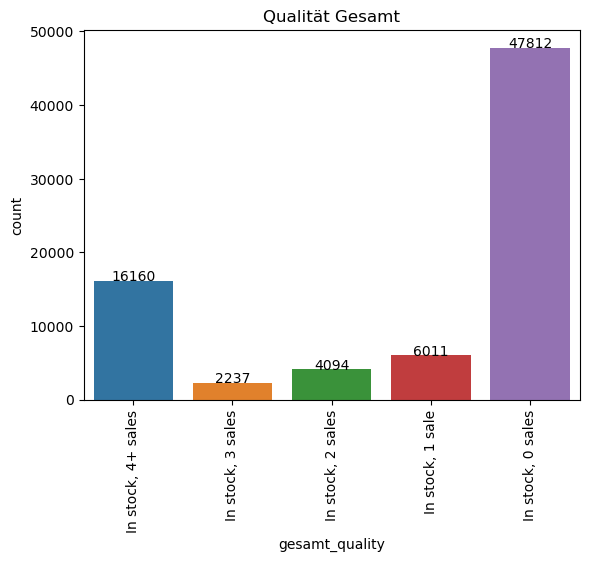

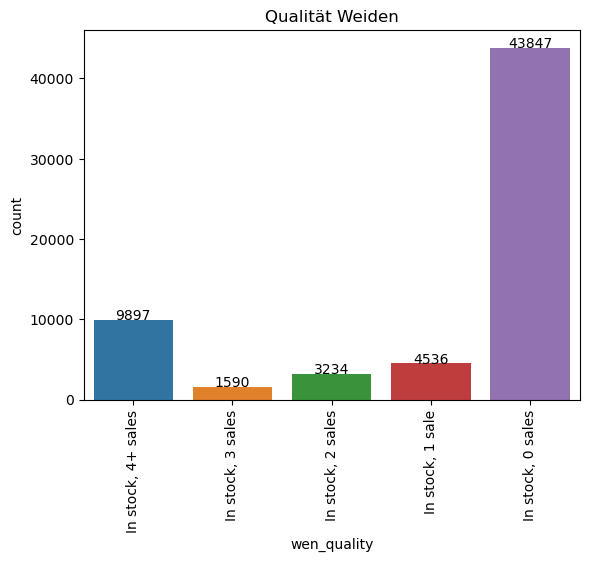

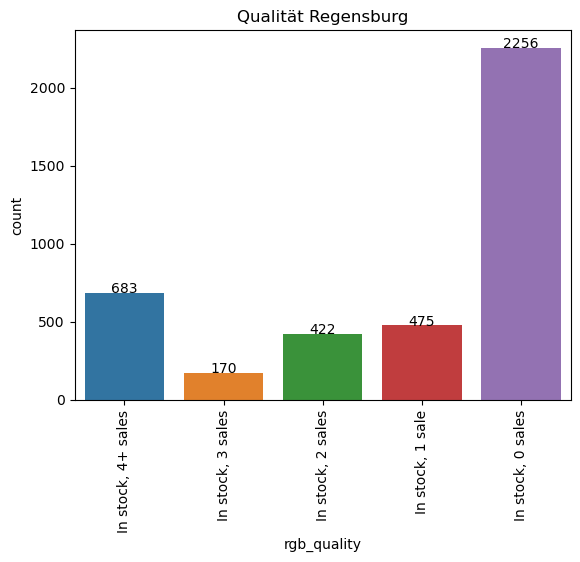

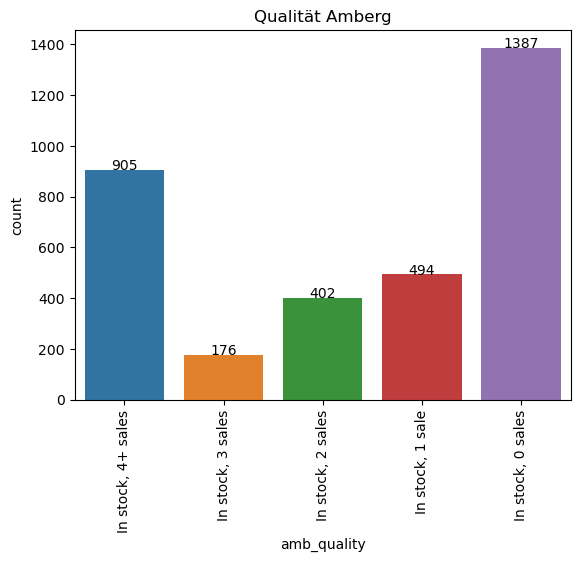

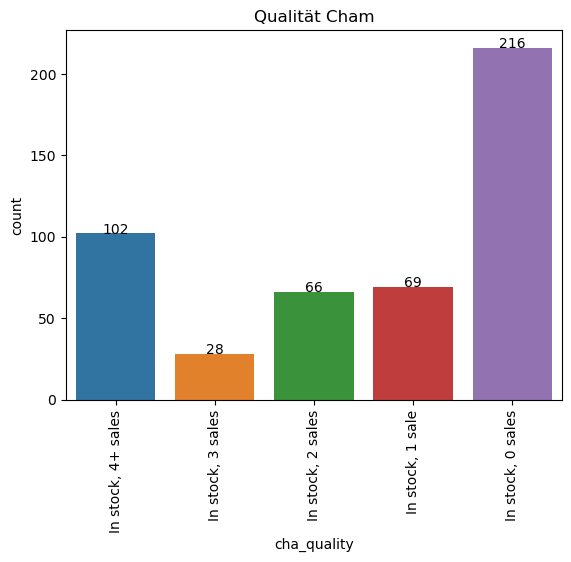

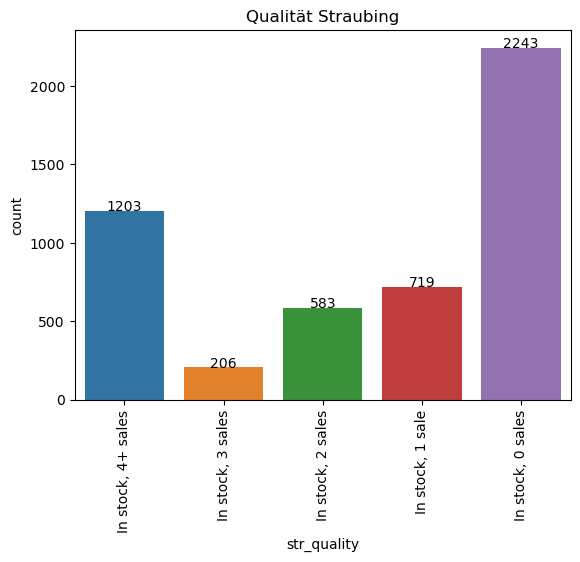

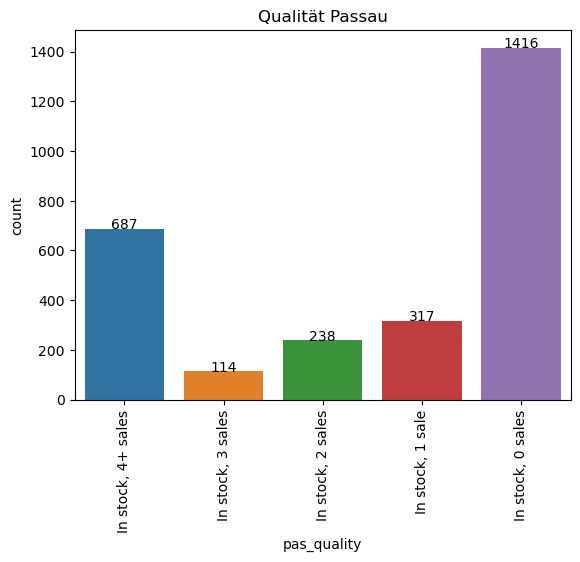

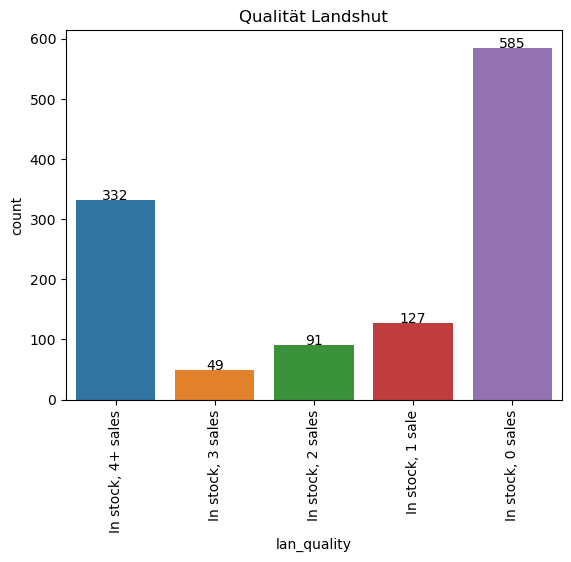

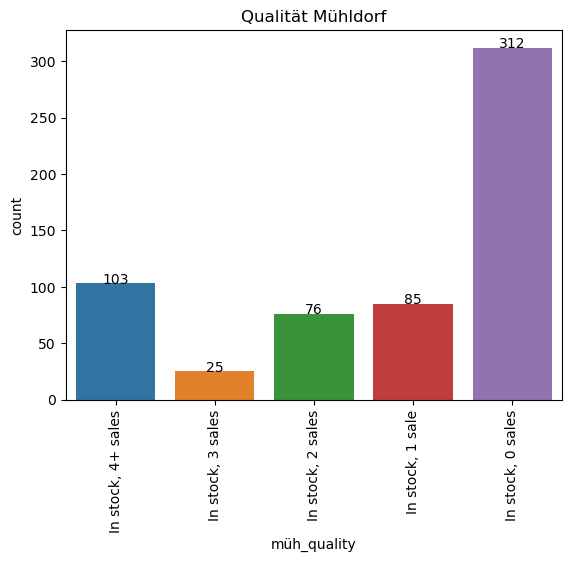

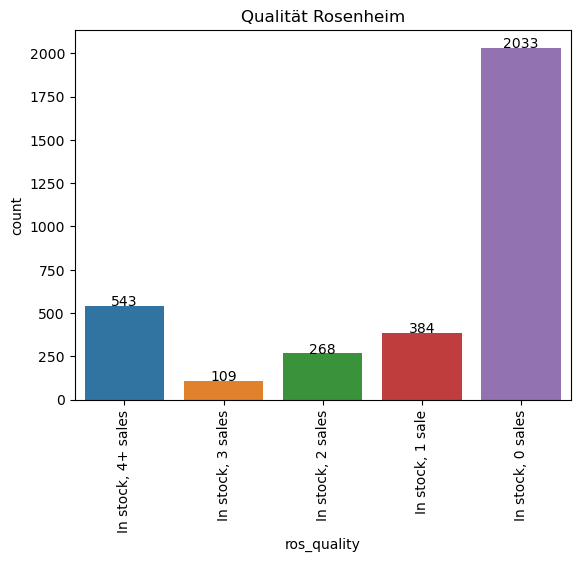

In [77]:
display_order_quality = PE_categories

locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "löschen"')
    location = location.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_quality)

    for p in ax.patches:
        # Erhalte die Höhe und die Position jedes Balkens
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2

        # Füge einen Text über dem Balken hinzu
        ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

    plt.xticks(rotation=90)
    plt.show()

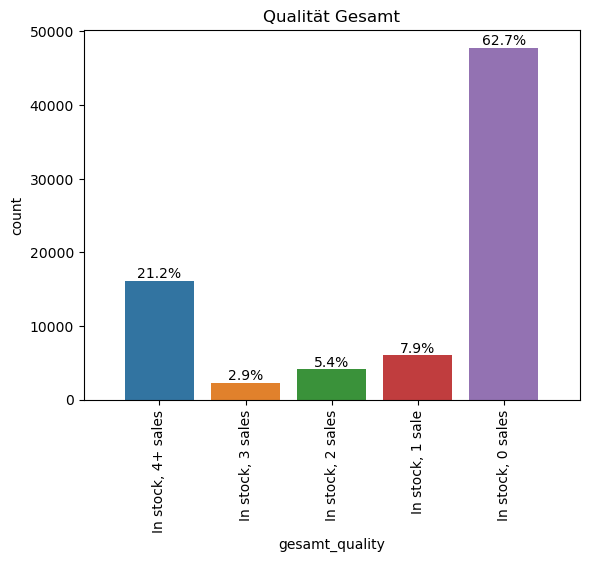

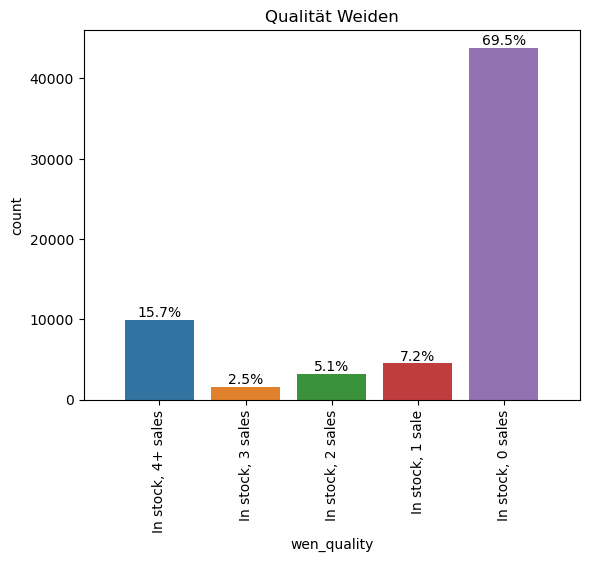

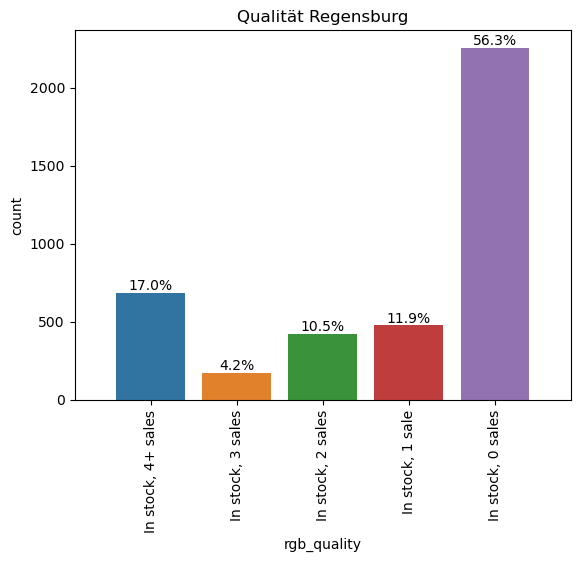

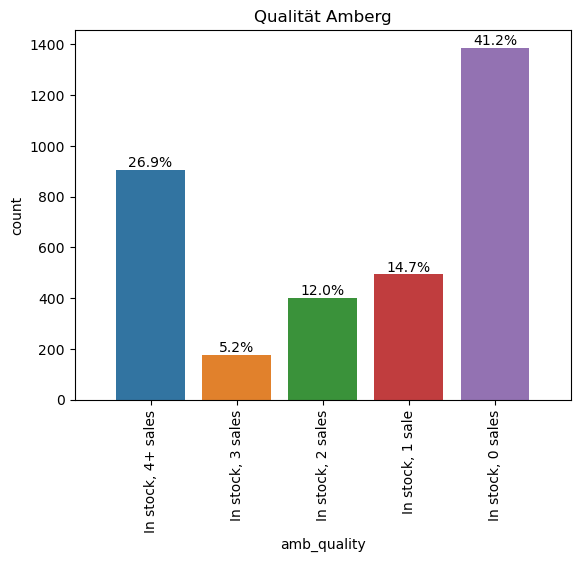

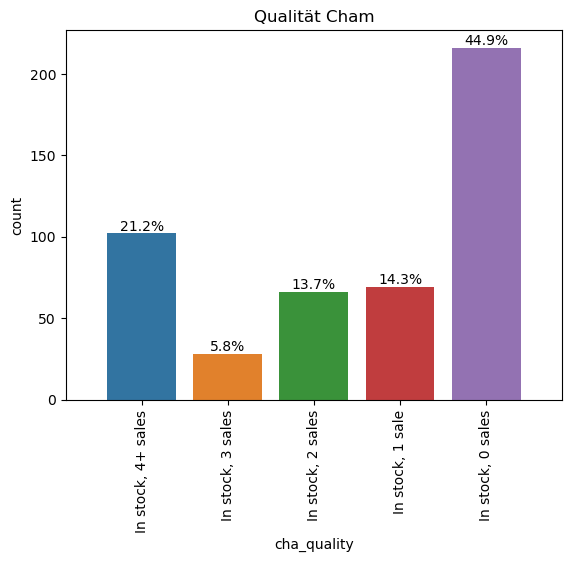

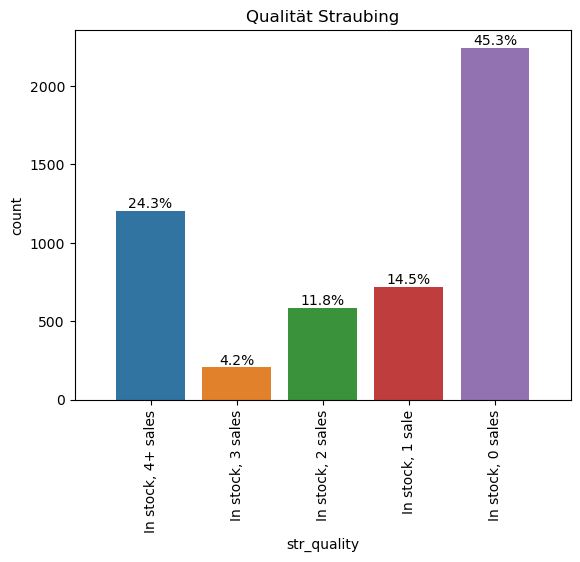

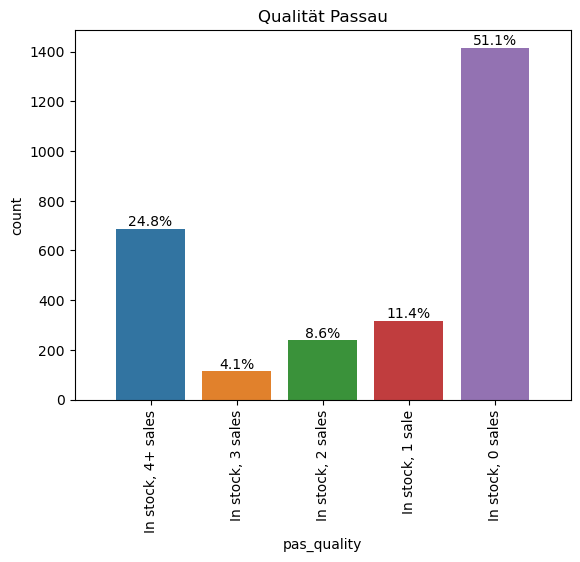

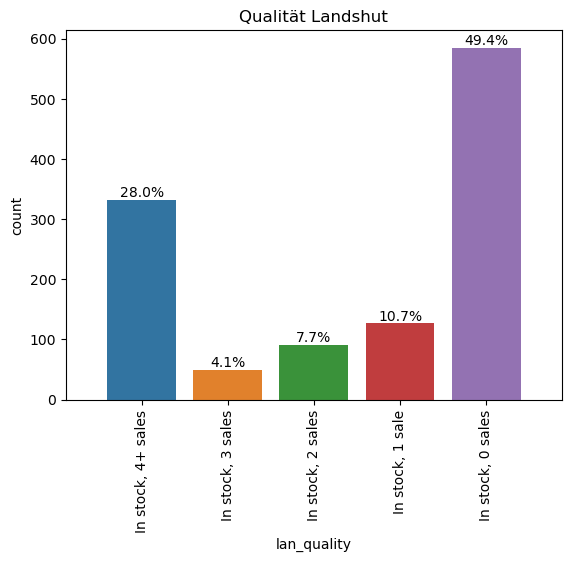

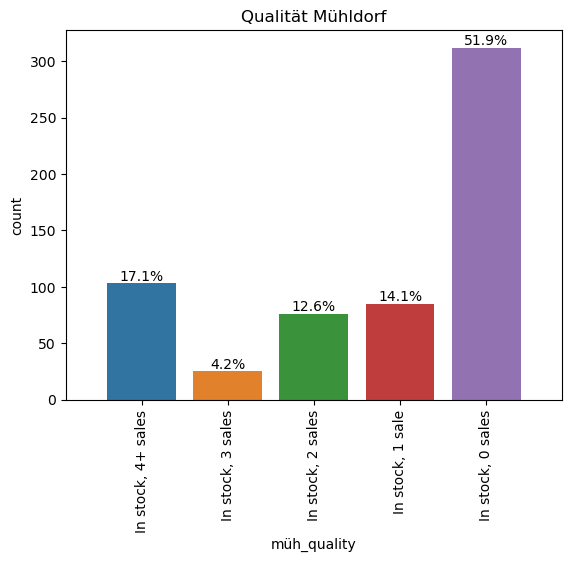

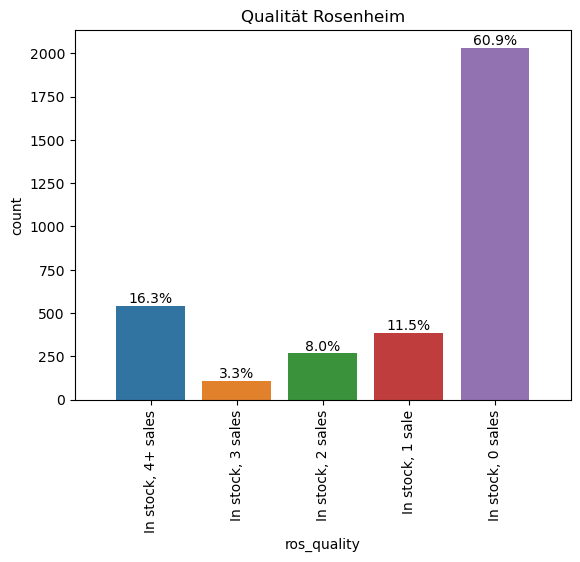

In [78]:
locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_quality)

    # Erhalten Sie die Gesamtzahl der Qualitätsspalte
    total = location[key + '_quality'].count()

    # Beschriften Sie die Balken mit dem fmt-Parameter
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

    # Fügen Sie etwas Platz am Ende des Balkens für die Beschriftungen hinzu
    ax.margins(x=0.1)

    plt.xticks(rotation=90)
    plt.show()

## Visualisation inventory management